In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import copy

In [2]:
data=pd.read_csv('WC.csv')

In [3]:
data.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0


In [4]:
data.shape

(304, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         304 non-null    int64  
 1   Team            304 non-null    object 
 2   Zone            279 non-null    float64
 3   Foot            279 non-null    object 
 4   Keeper          279 non-null    object 
 5   OnTarget        279 non-null    float64
 6   Goal            279 non-null    float64
 7   Penalty_Number  304 non-null    int64  
 8   Elimination     280 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.5+ KB


In [6]:
data.dropna(inplace=True)

In [7]:
data.shape

(279, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         279 non-null    int64  
 1   Team            279 non-null    object 
 2   Zone            279 non-null    float64
 3   Foot            279 non-null    object 
 4   Keeper          279 non-null    object 
 5   OnTarget        279 non-null    float64
 6   Goal            279 non-null    float64
 7   Penalty_Number  279 non-null    int64  
 8   Elimination     279 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.8+ KB


In [9]:
data.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0


In [10]:
column_mapping = [(x, data.columns.to_list().index(x)) for x in data.columns.to_list()]
print(column_mapping)
column_list = data.columns.to_list()
column_list.remove('Goal')
column_list.append('Goal')
print(column_list)

[('Game_id', 0), ('Team', 1), ('Zone', 2), ('Foot', 3), ('Keeper', 4), ('OnTarget', 5), ('Goal', 6), ('Penalty_Number', 7), ('Elimination', 8)]
['Game_id', 'Team', 'Zone', 'Foot', 'Keeper', 'OnTarget', 'Penalty_Number', 'Elimination', 'Goal']


In [11]:
data = data.reindex(columns=column_list)
data.head()

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Penalty_Number,Elimination,Goal
0,1,FRA,7.0,R,R,1.0,1,0.0,1.0
1,1,GER,9.0,R,C,1.0,2,0.0,1.0
2,1,FRA,6.0,R,L,1.0,3,0.0,1.0
3,1,GER,2.0,R,C,1.0,4,0.0,1.0
4,1,FRA,9.0,R,L,1.0,5,0.0,1.0


In [12]:
data = data.drop(['Game_id', 'Team', 'OnTarget', 'Elimination','Penalty_Number'], axis=1)

In [13]:
data.head()

,Zone,Foot,Keeper,Goal
0,7.0,R,R,1.0
1,9.0,R,C,1.0
2,6.0,R,L,1.0
3,2.0,R,C,1.0
4,9.0,R,L,1.0


In [14]:
data['Foot'] = data['Foot'].astype('category').cat.codes
data['Keeper'] = data['Keeper'].astype('category').cat.codes

X = data[['Zone', 'Foot', 'Keeper']]
y = data['Goal']


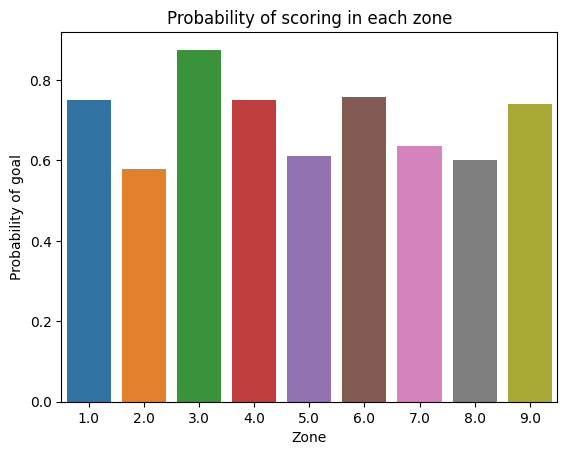

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

zone_probs = data.groupby('Zone')['Goal'].mean().reset_index()

sns.barplot(x='Zone', y='Goal', data=zone_probs)
plt.title('Probability of scoring in each zone')
plt.xlabel('Zone')
plt.ylabel('Probability of goal')
plt.show()

In [16]:
zone_probs = data.groupby('Zone')['Goal'].mean()
print('Probability of scoring in each zone is:', zone_probs)

Probability of scoring in each zone is: Zone
1.0    0.750000
2.0    0.578947
3.0    0.875000
4.0    0.750000
5.0    0.611111
6.0    0.757576
7.0    0.634921
8.0    0.600000
9.0    0.739130
Name: Goal, dtype: float64


In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import sem, t

# Load the test data
test_data = pd.read_csv('2022.csv')



In [18]:
test_data.head()

,Penalty_Number,Zone,Foot,Keeper,Goal
0,1,9,R,R,0
1,2,2,R,L,1
2,3,8,L,L,1
3,4,7,R,L,1
4,5,7,R,R,1


In [19]:

# Preprocess test_data
test_data.dropna(inplace=True)
test_data = test_data.reindex(columns=column_list)
test_data = test_data.drop(['Game_id', 'Team', 'OnTarget', 'Elimination','Penalty_Number'], axis=1)
test_data['Foot'] = test_data['Foot'].astype('category').cat.codes
test_data['Keeper'] = test_data['Keeper'].astype('category').cat.codes

# Load trained model
model = LogisticRegression()


# Fit the model 
model.fit(X, y)

# Use the model to make predictions on the new data
y_pred = model.predict(test_data[['Zone', 'Foot', 'Keeper']])


In [20]:
from sklearn.metrics import log_loss, accuracy_score

# Calculate the accuracy
accuracy = accuracy_score(test_data['Goal'], y_pred)

print("Accuracy: {:.2%}".format(accuracy))



Accuracy: 73.08%


In [21]:
## Bootstrap for confidence interval
import numpy as np
from sklearn.utils import resample

n_bootstraps = 1000

# Define an empty list to store the bootstrap accuracies
bootstrap_accuracies = []

# Perform the bootstrap
for i in range(n_bootstraps):
    # Resample the test data with replacement
    resampled_data = resample(test_data, replace=True, random_state=i)
    # Make predictions on the resampled data
    y_pred_resampled = model.predict(resampled_data[['Zone', 'Foot', 'Keeper']])
    # Calculate the accuracy of the predictions
    resampled_accuracy = accuracy_score(resampled_data['Goal'], y_pred_resampled)
    # Add the accuracy to the list
    bootstrap_accuracies.append(resampled_accuracy)

# Calculate the lower and upper bounds of the 95% confidence interval
lower_bound = np.percentile(bootstrap_accuracies, 2.5)
upper_bound = np.percentile(bootstrap_accuracies, 97.5)

print("95% Confidence Interval: [{:.2%}, {:.2%}]".format(lower_bound, upper_bound))

    

95% Confidence Interval: [53.85%, 88.46%]
